C:\Users\USA\anaconda3\lib\site-packages\ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in sqrt


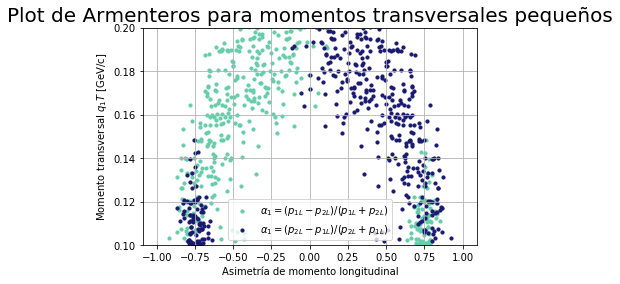

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
def metodos_armenteros():
    #PASO 1: MASAS DE LAS PARTICULAS 
    masa_kaon = 497.671/10.0**3 #GeV
    masa_lambda = 1115.63/10.0**3 #GeV
    masa_proton = 938.27231/10.0**3 #GeV
    masa_pion = 139.56755/10.0**3 #GeV
    #PASO 2: SELECCION DEL PROCESO
    #Generador de numeros aleatorios
    Na = random.random()
    # Kaon ---> proton + pion
    if Na <= 0.5:
        masa_madre = masa_kaon
        tipo_particula = "kaon"
        m1 = masa_pion
        m2 = masa_pion
    if Na > 0.5 and Na <= 0.75:
        masa_madre = masa_lambda
        tipo_particula = "Particula"
        
        m1 = masa_proton
        m2 = masa_pion
    if Na > 0.75 and Na <= 1:
        masa_madre = masa_lambda
        tipo_particula = "Antiparticula"
        m1 = masa_pion
        m2 = masa_proton
    #PASO 3: ELEGIR ENERGIA DE M
    #Sistema del laboratorio
    mu = 2*masa_madre
    sigma = 0.2*masa_madre
    distribucion = np.random.normal(mu, sigma)    
    #PASO 4: MOMENTO DE M QUE DECAE
    magnitud_momento_madre = np.sqrt(distribucion*distribucion - masa_madre*masa_madre)
    #PASO 5: GAMMA Y BETA-GAMMA
    gamma = distribucion/masa_madre
    gamma_beta = magnitud_momento_madre/masa_madre
    #PASO 6: UBICARNOS EN MARCO DE REFERENCIA EN REPOSO
    #Energias
    E1 = (masa_madre*masa_madre + m1*m1 - m2*m2)/(2*masa_madre)
    E2 = (masa_madre*masa_madre + m2*m2 - m1*m1 )/(2*masa_madre)
    #Momentos
    magnitud_p1 = np.sqrt(E1*E1 - m1*m1)
    magnitud_p2 = np.sqrt(E2*E2 - m2*m2)
    #PASO 7: ELEGIR DIRECCIONES DE MOMENTOS
    #Angulos isotropia
    angulo_azimutal = Na*2*np.pi
    angulo_polar = np.arccos(-1+Na*2)
    #Direcciones
    p1_x = magnitud_p1*np.cos(angulo_polar)
    p1_y = magnitud_p1*np.sin(angulo_polar)*np.cos(angulo_azimutal)
    p1_z = magnitud_p1*np.sin(angulo_polar)*np.sin(angulo_azimutal)
    
    p2_x = -p1_x
    p2_y = -p1_y
    p2_z = -p1_z
    #PASO 9:TRANSFORMACIONES DE LORENTZ ENERGIA Y MOMENTO
    #Particula 1
    E1_marco_S = gamma*E1 + gamma_beta*p1_x
    p1x_marco_S = gamma*p1_x + gamma_beta*E1
    p1y_marco_S = p1_y
    p1z_marco_S = p1_z

    angulo1_polar_S = np.arctan(np.sqrt(p1y_marco_S*p1y_marco_S + p1z_marco_S*p1z_marco_S)/p1x_marco_S)
    angulo1_azimutal_S = np.arctan(p1z_marco_S/p1y_marco_S)
    #Particula 2
    E2_marco_S = gamma*E2 + gamma_beta*p2_x
    p2x_marco_S = gamma*p2_x + gamma_beta*E2
    p2y_marco_S = p2_y
    p2z_marco_S = p2_z

    angulo2_polar_S = np.arctan(np.sqrt(p2y_marco_S*p2y_marco_S + p2z_marco_S*p2z_marco_S)/p2x_marco_S)
    angulo2_azimutal_S = np.arctan(p2z_marco_S/p2y_marco_S)
    #PASO 1O: SMEARING
    #Resolucion del detector
    delta_E1_marco_S = 0.1*E1_marco_S
    delta_E2_marco_S = 0.1*E2_marco_S

    delta_angulo1_polar_S = 0.1*angulo1_polar_S
    delta_angulo2_polar_S = 0.1*angulo2_polar_S

    delta_angulo1_azimutal_S = 0.1*angulo1_azimutal_S
    delta_angulo2_azimutal_S = 0.1*angulo2_azimutal_S

    #Smearing
    #Particula 1
    mu_E1 = E1_marco_S
    sigma_E1 = delta_E1_marco_S
    gauss_E1 = np.random.normal(mu_E1,sigma_E1)
    mu_angulo1_polar = angulo1_polar_S
    sigma_angulo1_polar_S =  delta_angulo1_polar_S
    gauss_angulo1_polar = np.random.normal(mu_angulo1_polar,abs(sigma_angulo1_polar_S))
    mu_angulo1_azimutal = angulo1_azimutal_S
    sigma_angulo1_azimutal =  delta_angulo1_azimutal_S
    gauss_angulo1_azimutal = np.random.normal(mu_angulo1_azimutal,abs(sigma_angulo1_azimutal))

    #Particula 2
    mu_E2 = E2_marco_S
    sigma_E2 = delta_E2_marco_S
    gauss_E2 = np.random.normal(mu_E2,sigma_E2)
    mu_angulo2_polar = angulo2_polar_S
    sigma_angulo2_polar_S =  delta_angulo2_polar_S
    gauss_angulo2_polar = np.random.normal(mu_angulo2_polar,abs(sigma_angulo2_polar_S))
    mu_angulo2_azimutal = angulo2_azimutal_S
    sigma_angulo2_azimutal =  delta_angulo2_azimutal_S
    gauss_angulo2_azimutal = np.random.normal(mu_angulo2_azimutal,abs(sigma_angulo2_azimutal))
    #PASO 11: REPRODUCCION MOMENTOS OBSERVADOS
    p1_obs = np.sqrt(gauss_E1*gauss_E1 - m1*m1)
    p2_obs = np.sqrt(gauss_E2*gauss_E2 - m2*m2)
    #Componentes
    p1_x_obs = p1_obs*np.cos(gauss_angulo1_polar)
    p1_y_obs = p1_obs*np.sin(gauss_angulo1_polar)*np.cos(gauss_angulo1_azimutal)
    p1_z_obs = p1_obs*np.sin(gauss_angulo1_polar)*np.sin(gauss_angulo1_azimutal)

    p2_x_obs = p2_obs*np.cos(gauss_angulo2_polar)
    p2_y_obs = p2_obs*np.sin(gauss_angulo2_polar)*np.cos(gauss_angulo2_azimutal)
    p2_z_obs = p2_obs*np.sin(gauss_angulo2_polar)*np.sin(gauss_angulo2_azimutal)

    #PASO 12: COMPONENTES LONGITUDINALES Y TRANSVERSALES

    #longitudinal
    p1_L = p1_x_obs
    p2_L = p2_x_obs
    #Transversales
    p1_T = np.sqrt(p1_y_obs*p1_y_obs + p1_z_obs*p1_z_obs)
    p2_T = np.sqrt(p2_y_obs*p2_y_obs + p2_z_obs*p2_z_obs)
    #Angulos
    numerador = (p1_x_obs*p2_x_obs + p1_y_obs*p2_y_obs + p1_z_obs*p2_z_obs)
    denominador = p1_obs*p2_obs
    cos_angulo_entre = numerador/denominador
    #PASO 14: PARTICULA QUE HAYA DECAIDO
    masa_madre_obs = np.sqrt((gauss_E1 + gauss_E2)*(gauss_E1 + gauss_E2) - (p1_obs + p2_obs)*(p1_obs + p2_obs))
    #Asimetria
    asimetria1 = (p1_L - p2_L)/(p1_L + p2_L)
    asimetria2 = (p2_L - p1_L)/(p1_L + p2_L)
    return(p1_T,asimetria1,asimetria2, tipo_particula)

#GRAFICA y MONTE CARLO:
n_simulacion = 1000
datos_T = []
datos_alfa1 = []
datos_alfa2 = []
i = 0
for i in range(0,n_simulacion):
    p_T,alfa1,alfa2, tipo = metodos_armenteros()
    datos_T.append(p_T)
    datos_alfa1.append(alfa1)
    datos_alfa2.append(alfa2)
    i = i+1
plt.figure()
plt.scatter(datos_alfa1, datos_T, s = 10, label="$\\alpha_1=(p_{1L}-p_{2L})/(p_{1L}+p_{2L})$",c="mediumaquamarine")
plt.scatter(datos_alfa2, datos_T,s= 10, label="$\\alpha_1=(p_{2L}-p_{1L})/(p_{2L}+p_{1L})$",c="midnightblue")
plt.legend()
#plt.scatter(list(map(lambda x:x/2, datos_alfa1)),datos_T)
#plt.scatter(list(map(lambda x:x/2, datos_alfa2)),datos_T)
plt.grid()
plt.ylim(0.1,0.2)
plt.ylabel("Momento transversal $q_1T$ [GeV/c]")
plt.xlabel("Asimetría de momento longitudinal")
plt.title("Plot de Armenteros para momentos transversales pequeños",size=20)
plt.savefig("armenteros.png")



